In [38]:
# import the necessary packages
from keras.datasets import fashion_mnist

print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

[INFO] loading Fashion MNIST...


# Problem

1. (25%) Please implement a CNN for image recognition. You need to design at least two layers of
convolutional layers and analyze the effect of different settings including stride size and filter size.
The objective function is E(w) = −
1
m
X
M
m=1
X
C
i=1
tmilogSi
, (1)
where tmi is the ith target of the mth sample in the batch, M is the batch size, C is the classes
for each sample, Si
is softmax activation of neural nets output function.

In [29]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras import models

In [20]:
# import the necessary packages
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import cv2
 
# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 10
INIT_LR = 1e-2
BS = 32

In [107]:
if K.image_data_format() == "channels_first":
    trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
    testX = testX.reshape((testX.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [108]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [18]:
def Model(width, height, depth, classes):
# initialize the model along with the input shape to be
# "channels last" and the channels dimension itself
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
 
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # second CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model

In [22]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = Model(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,validation_data=(testX, testY), batch_size=BS, epochs=NUM_EPOCHS)

[INFO] compiling model...
[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 565s 9ms/step - loss: 0.5169 - acc: 0.8254 - val_loss: 0.3422 - val_acc: 0.8755
Epoch 2/10
60000/60000 [==============================] - 564s 9ms/step - loss: 0.3379 - acc: 0.8775 - val_loss: 0.2918 - val_acc: 0.8957
Epoch 3/10
60000/60000 [==============================] - 557s 9ms/step - loss: 0.2979 - acc: 0.8927 - val_loss: 0.2487 - val_acc: 0.9111
Epoch 4/10
60000/60000 [==============================] - 575s 10ms/step - loss: 0.2778 - acc: 0.8998 - val_loss: 0.2455 - val_acc: 0.9124
Epoch 5/10
60000/60000 [==============================] - 555s 9ms/step - loss: 0.2651 - acc: 0.9049 - val_loss: 0.2388 - val_acc: 0.9119
Epoch 6/10
60000/60000 [==============================] - 555s 9ms/step - loss: 0.2568 - acc: 0.9070 - val_loss: 0.2348 - val_acc: 0.9159
Epoch 7/10
60000/60000 [==============================] - 559s 9ms/ste

In [23]:
# make predictions on the test set
preds = model.predict(testX)
 
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),target_names=labelNames))
 

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.87      0.86      0.87      1000
     trouser       0.99      0.98      0.99      1000
    pullover       0.91      0.88      0.90      1000
       dress       0.92      0.91      0.92      1000
        coat       0.87      0.89      0.88      1000
      sandal       0.99      0.98      0.98      1000
       shirt       0.75      0.78      0.76      1000
     sneaker       0.95      0.98      0.97      1000
         bag       0.98      0.98      0.98      1000
  ankle boot       0.98      0.95      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



2. (25%) Plot the learning curve, accuracy rate of training and test sets as the example found in
Figure 1, and Figure 2.

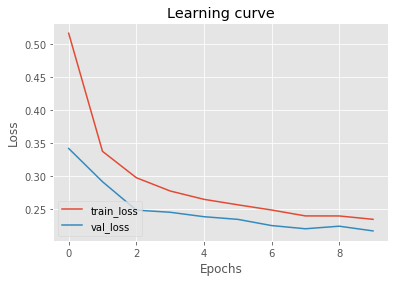

In [26]:
# plot the training loss 
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="lower left")

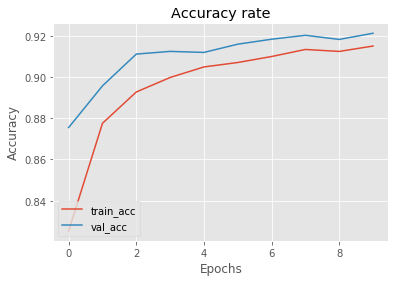

In [27]:
#plot accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Accuracy rate")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

3. (25%) Please plot activations of the first layer as illustrated in Figure.4. Please also plot the
corresponding image with your prediction and label (see Figure 3) and explain what you observe.

In [50]:
layer_outputs = [layer.output for layer in model.layers[:1]] 
# Extracts the outputs of the first layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

ankle boot


(-0.5, 27.5, 27.5, -0.5)

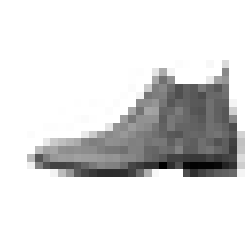

In [97]:
test_x = testX.reshape((testX.shape[0], 1, 28, 28))
test_x = test_x.astype("float32") / 255.0

img = testX[0].reshape(1,28,28,1)
prediction = preds.argmax(axis=1)
label = labelNames[prediction[0]]
print(label)
plt.imshow(img[0,:,:,0],cmap="binary")
plt.axis('off')

In [ ]:
preds.

In [52]:
activations = activation_model.predict(img)

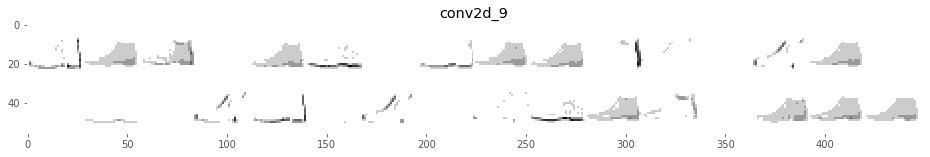

In [87]:
images_per_row = 16
first_layer_activation = activations[0]
features = first_layer_activation.shape[-1]
size = first_layer_activation.shape[1]
first_layer_activation = first_layer_activation.reshape(1,28,28,32)
n_cols = n_features // images_per_row
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = layer_activation[0,:, :,col * images_per_row + row]
        channel_image -= channel_image.mean() 
        channel_image /= channel_image.std()
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        scale = 1 / size
plt.figure(figsize=(scale * display_grid.shape[1],
        scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='binary')

(1, 28, 28, 32)


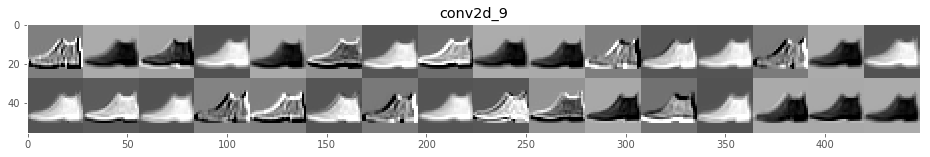

In [71]:
layer_names = []
for layer in model.layers[0:1]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    layer_activation = layer_activation.reshape(1,28,28,32)
    print(layer_activation.shape)
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='binary')

The first layer retains almost the full shape. We can see the outer shape of the shoes.

4. (25%) Please classify the clothing and plot the corresponding image and label (see Figure 5). The
color of the label is green, it means the prediction is successful. If the color is red, it means the
prediction is fails.

In [119]:
from imutils import build_montages

images = []

for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = labelNames[prediction[0]]
 

    if K.image_data_format() == "channels_first":
        image = (testX[i][0] * 255).astype("uint8")
    else:
        image = (testX[i] * 255).astype("uint8")
        

    #green if correct
    color = (0, 255, 0)
    #red if incorrect
    if prediction[0] != np.argmax(testY[i]):
        color = (0, 0, 255)
 
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

    images.append(image)

montage = build_montages(images, (96, 96), (4, 4))[0]
 
# show the output
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

0